<a href="https://colab.research.google.com/github/201524495/201524495/blob/main/%EC%8B%A4%EC%8A%B5_3_250714_subset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# [Slide 6] 베이즈 의사결정 이론 실습 문제


## 1. Bayes’ Theorem: Discrete Case
**문제 1:**
두 개의 상자가 있습니다.
- 상자 1: 빨간 공 2개, 파란 공 8개
- 상자 2: 빨간 공 5개, 파란 공 5개

무작위로 상자 하나를 선택해서, 공을 하나 뽑았더니 빨간 공이 나왔습니다.

**질문:** 빨간 공이 나왔다면, 내가 뽑은 상자가 상자 2일 확률은 얼마인가요? (베이즈 정리 사용)

reference: [Bayes' Theorem](https://en.wikipedia.org/wiki/Bayes%27_theorem)


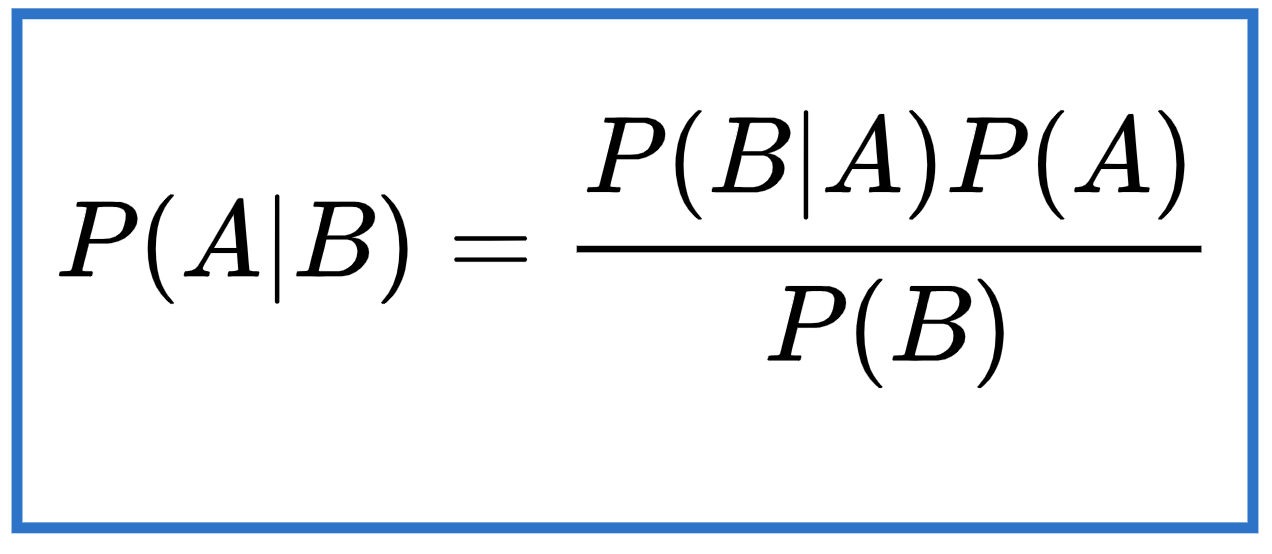

In [ ]:
# 풀이
P_box1 = 0.5
P_box2 = 0.5
P_red_given_box1 = 2/10
P_red_given_box2 = 5/10
P_red = P_box1 * P_red_given_box1 + P_box2 * P_red_given_box2
P_box2_given_red = (P_red_given_box2 * P_box2) / P_red
print("빨간 공이 나왔을 때, 상자 2일 확률:", P_box2_given_red)

빨간 공이 나왔을 때, 상자 2일 확률: 0.7142857142857143


**설명:**
- 각 상자를 뽑을 확률과, 각 상자에서 빨간 공을 뽑을 확률을 계산합니다.
- 베이즈 정리를 사용해 빨간 공이 상자 2에서 나왔을 확률을 구합니다.

### **실습 문제 1.**

- 상자 1에 빨간 공 3개, 파란 공 7개가 있다고 바꿔 보세요.
- 이때 빨간 공이 나왔을 때 상자 2일 확률을 직접 계산해 보세요.

In [ ]:
# 연습 코드 작성 칸


In [ ]:
# 상자 1에 빨간 공 3개, 파란 공 7개로 변경
P_box1 = 0.5
P_box2 = 0.5
P_red_given_box1 = 3/10    # 상자1에서 빨간공
P_red_given_box2 = 5/10    # 상자2에서 빨간공 (변함없음)
P_red = P_box1 * P_red_given_box1 + P_box2 * P_red_given_box2

# 베이즈 정리 적용
P_box2_given_red = (P_red_given_box2 * P_box2) / P_red
print("빨간 공이 나왔을 때, 상자 2일 확률:", P_box2_given_red)

빨간 공이 나왔을 때, 상자 2일 확률: 0.625


---

## 2. MAP vs ML 추정
**문제 2:**
동전을 10번 던져서 앞면이 7번 나왔습니다. 앞면이 나올 확률 θ를 추정하세요.

**(a) ML 추정**

In [ ]:
# 최대 우도(ML) 추정값
heads = 7
tails = 3
theta_ml = heads / (heads + tails)
print("ML 추정값:", theta_ml)

ML 추정값: 0.7


**(b) MAP 추정**

### [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution)

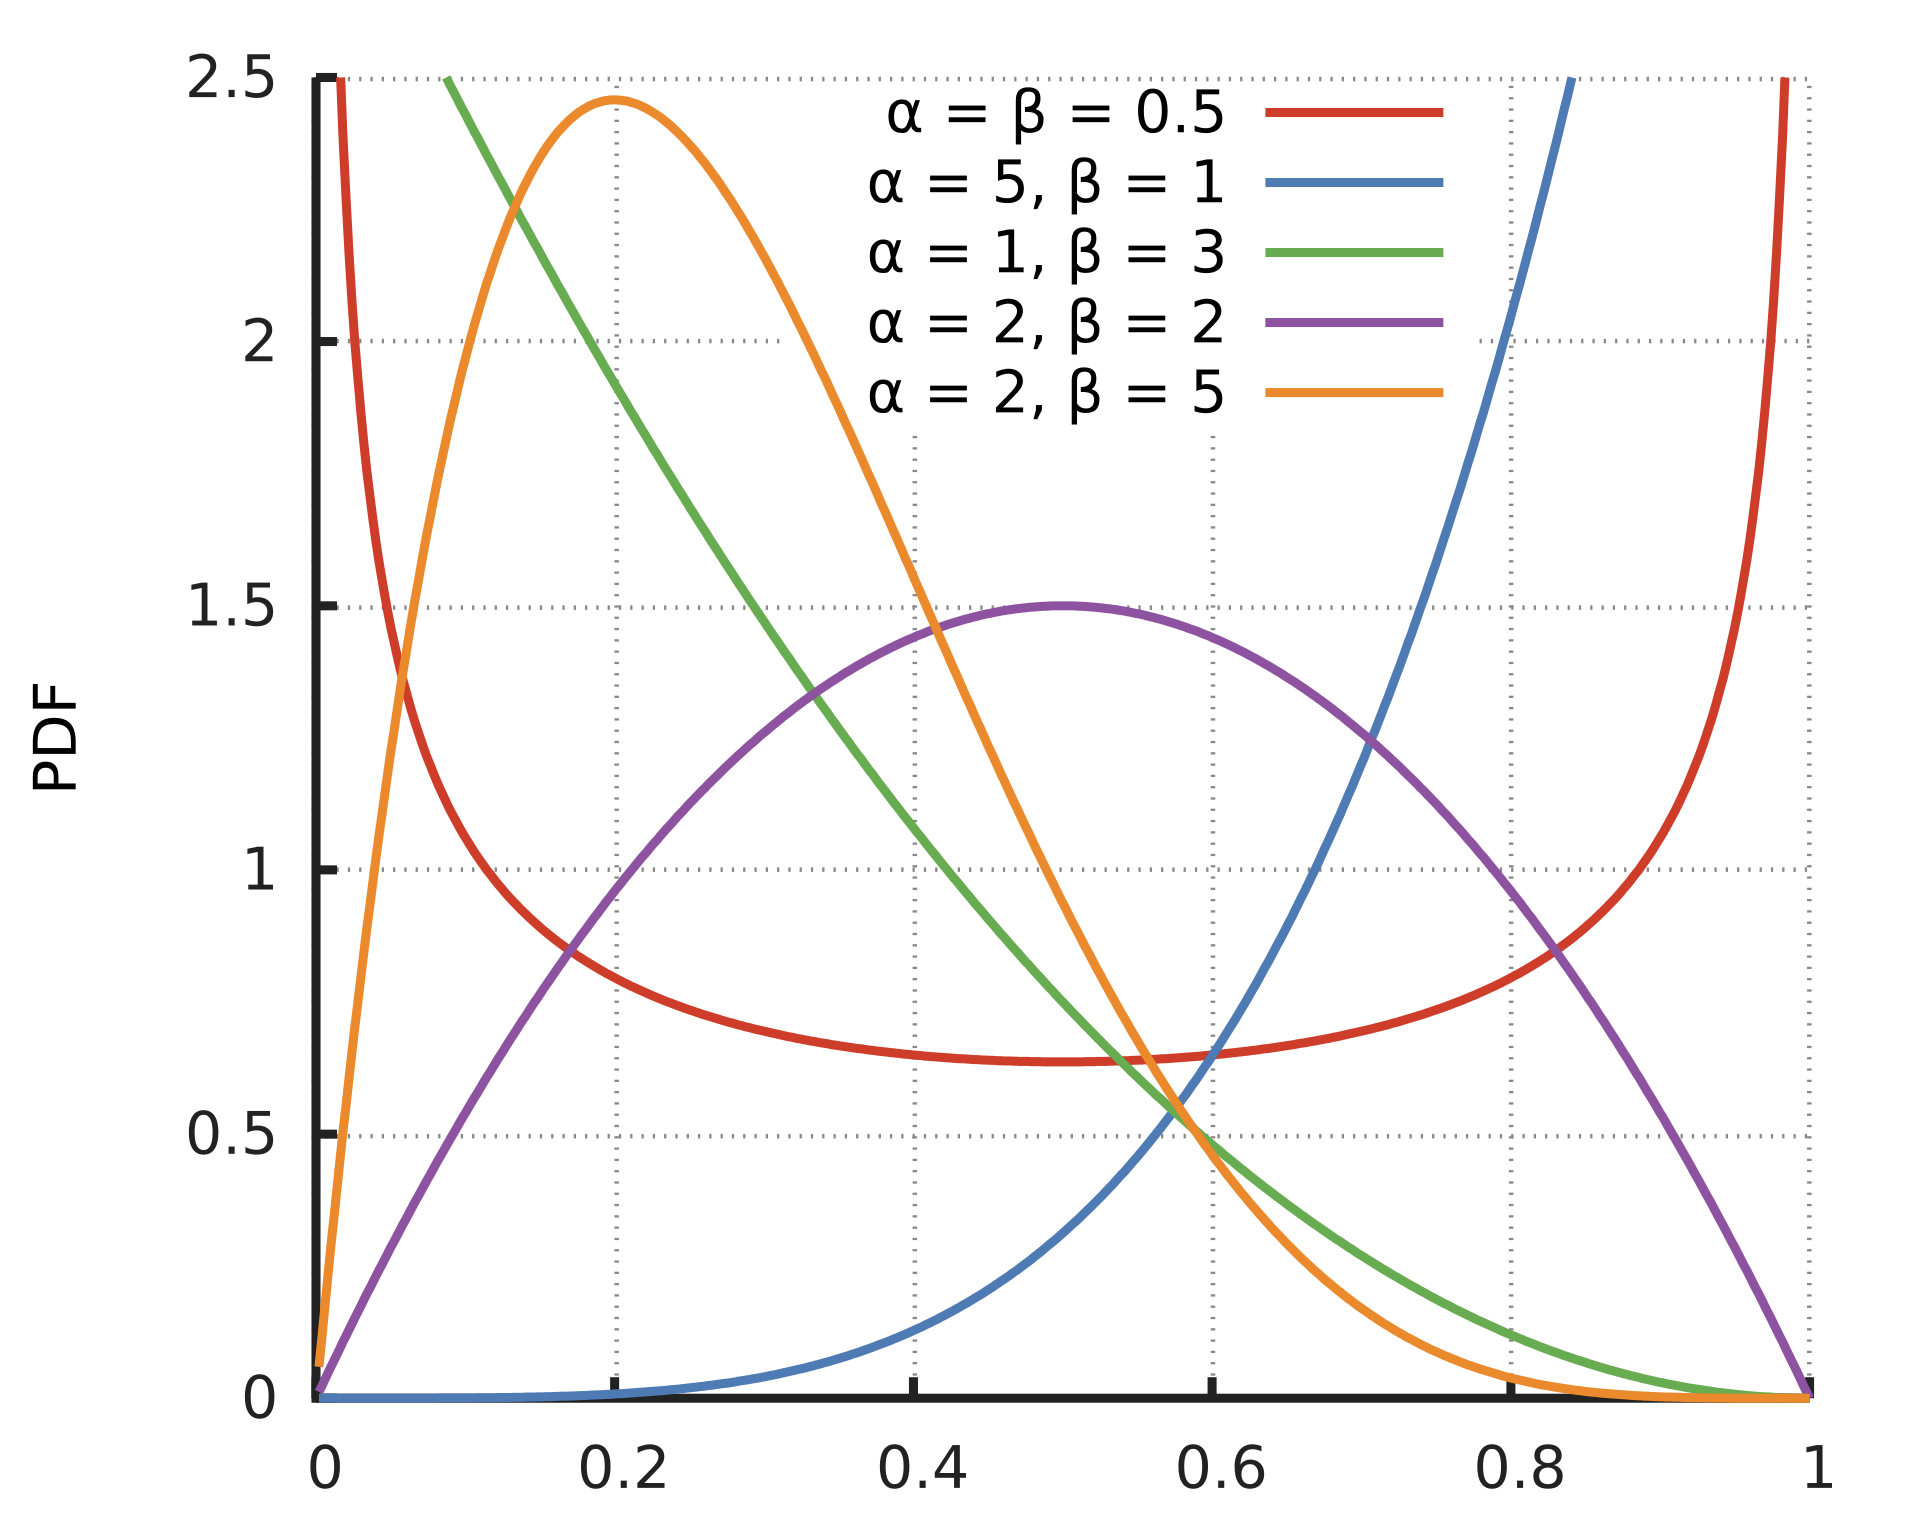

In [ ]:
# Beta(2,2) 사전분포 사용
alpha_prior = 2
beta_prior = 2
theta_map = (heads + alpha_prior - 1) / (heads + tails + alpha_prior + beta_prior - 2)
print("MAP 추정값:", round(theta_map, 3))

MAP 추정값: 0.667


### MAP 추정과 Beta 분포 설명
이 노트북은 동전 던지기 예제를 중심으로 MAP 추정값(`theta_map`)의 의미와 계산공식, 그리고 Beta 분포가 어떻게 사용되는지 단계별로 설명합니다.


#### 1. MAP (Maximum A Posteriori) 추정 기본 공식
MAP 추정 공식은 다음과 같습니다:

$$
\theta_{\text{MAP}} = \arg\max_{\theta} \; P(\theta \mid \text{data})
$$

즉, **데이터를 관찰한 후, θ(확률)의 사후확률이 가장 큰 값**을 찾는 것입니다.

베이즈 정리를 이용하면:
$$
P(\theta \mid \text{data}) \propto P(\text{data} \mid \theta) \cdot P(\theta)
$$
- $P(\text{data} \mid \theta)$: 데이터가 θ일 때 나올 확률 (우도)
- $P(\theta)$: 실험 전 θ에 대한 믿음, 즉 사전분포(Beta 분포)

#### 2. 동전 던지기 예제에 적용
- 동전을 $N$번 던져서 앞면 $k$번 관찰
- θ: 앞면이 나올 확률

**(1) Likelihood (우도):**
$$
P(\text{data}|\theta) = \theta^{k}(1-\theta)^{N-k}
$$
**(2) Prior (사전분포, Beta):**
$$
P(\theta) = \text{Beta}(\alpha, \beta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$
**(3) Posterior (사후확률):**
$$
P(\theta | \text{data}) \propto \theta^{k+\alpha-1}(1-\theta)^{N-k+\beta-1}
$$
즉, 이것 역시 Beta 분포의 꼴이 됨
- $\theta \sim \text{Beta}(k+\alpha, N-k+\beta)$

#### 3. MAP 값: Beta 분포의 최댓값(Mode)
Beta($\alpha'$, $\beta'$)의 최댓값(Mode)은 아래 공식으로 계산할 수 있습니다:
$$
\theta_{\text{MAP}} = \frac{\alpha' - 1}{\alpha' + \beta' - 2}
$$
(단, $\alpha', \beta' > 1$일 때)

- $\alpha' = k + \alpha$
- $\beta' = N - k + \beta$


- Beta 분포는 0~1 사이의 확률에 대해 사용할 수 있는 분포입니다.

- 구체적으로 **Beta(2,2)**는 α=2, β=2인 Beta 분포입니다.
    - “동전이 너무 치우치진 않을 것 같아. 그래도 혹시 모르니 양쪽 모두 조금은 열어두고 싶다” 라는 입장입니다.

- 데이터(실험 결과)와 합쳐서 최종 MAP 추정값을 구했습니다.
- 공식은 위에서 설명한 beta 분포의 mode(최댓값)에서 유도됩니다.


**설명:**
- ML은 단순히 앞면 횟수 / 전체 횟수 입니다.
- MAP은 사전분포의 '가상 데이터'를 추가로 반영한 추정값입니다.

---

## 3. 베이즈 의사결정 규칙: 두 개의 가우시안 분류
**문제 3:**
두 개의 클래스가 있습니다.
- 클래스 1: X ~ N(0, 1²), 사전확률 0.4
- 클래스 2: X ~ N(2, 1²), 사전확률 0.6

X = 1이 관측되었습니다. 베이즈 규칙(MAP)을 사용하여 이 샘플을 어느 클래스로 분류해야 하나요?

In [ ]:
import numpy as np
from scipy.stats import norm

# 클래스 사전확률
P1 = 0.4
P2 = 0.6
# 평균과 표준편차
mu1, std1 = 0, 1
mu2, std2 = 2, 1
# 우도 계산
x = 1
lik1 = norm.pdf(x, mu1, std1)
lik2 = norm.pdf(x, mu2, std2)
# 사후확률(정규화 전)
post1 = lik1 * P1
post2 = lik2 * P2
if post1 > post2:
    print("클래스 1로 분류")
else:
    print("클래스 2로 분류")


print(lik1, lik2)

클래스 2로 분류
0.24197072451914337 0.24197072451914337


**설명:**
- 각 클래스에 대해 x=1일 때의 확률밀도에 사전확률을 곱합니다.
- 값이 더 큰 클래스로 분류합니다.

### **실습 문제 3.**

- 사전확률을 둘 다 0.5로 바꿔보세요. X=1.5일 때 어떤 클래스가 선택되나요?
- X = 0일 때는 어떤 클래스가 선택되나요?
- 직접 값을 바꿔보고 결과를 확인하세요.

In [ ]:
# 연습 코드 작성 칸

In [ ]:
import numpy as np
from scipy.stats import norm

# (1) 사전확률 0.5, X=1.5
P1 = 0.5
P2 = 0.5
mu1, std1 = 0, 1
mu2, std2 = 2, 1
x = 1.5
lik1 = norm.pdf(x, mu1, std1)
lik2 = norm.pdf(x, mu2, std2)
post1 = lik1 * P1
post2 = lik2 * P2
print(round(post1, 4), round(post2, 4))
if post1 > post2:
    print("X=1일 때: 클래스 1로 분류")
else:
    print("X=1일 때: 클래스 2로 분류")

# (2) X=0일 때
x = 0
lik1 = norm.pdf(x, mu1, std1)
lik2 = norm.pdf(x, mu2, std2)
post1 = lik1 * P1
post2 = lik2 * P2
print(round(post1, 4), round(post2, 4))
if post1 > post2:
    print("X=0일 때: 클래스 1로 분류")
else:
    print("X=0일 때: 클래스 2로 분류")

0.0648 0.176
X=1일 때: 클래스 2로 분류
0.1995 0.027
X=0일 때: 클래스 1로 분류


# [Slide 7] 정보이론(Information Theory) 실습 문제


## 1. 엔트로피(Entropy) 계산
**문제 5:**
동전을 한 번 던졌을 때, 앞면이 나올 확률: 0.7, 뒷면: 0.3
이 동전의 엔트로피를 계산해보세요.


In [ ]:
import numpy as np

# 확률 정의
p_head = 0.7
p_tail = 0.3

# 엔트로피 공식: H(X) = -∑ p(x) log2 p(x)
entropy = - (p_head * np.log2(p_head) + p_tail * np.log2(p_tail))
print("동전의 엔트로피:", round(entropy, 3), "bits")


동전의 엔트로피: 0.881 bits


**설명:**
- 엔트로피는 불확실성(랜덤성)의 양을 나타냅니다.
- log의 밑이 2일 때 단위는 bit입니다.


###**실습 문제 5.**
- 주사위를 한 번 던졌을 때, 각 면이 나올 확률이 동일(1/6)이라고 할 때, 엔트로피를 구해보세요!


In [ ]:
# 여기에 코드 작성


In [ ]:
# 정답 코드
p = np.ones(6) / 6
entropy = -np.sum(p * np.log2(p))
print("주사위의 엔트로피:", round(entropy, 3), "bits")
# 6면 모두 동일한 확률이면 엔트로피가 최대입니다.


주사위의 엔트로피: 2.585 bits


---
## 2. Joint Entropy 계산
**문제 6:**
두 변수 X, Y가 각각 {0,1} 값을 가지며, 아래 결합확률이 주어집니다.

|       | Y=0  | Y=1  |
|-------|------|------|
| X=0   | 0.2  | 0.3  |
| X=1   | 0.1  | 0.4  |

이 때, Joint Entropy H(X, Y)를 계산해보세요.


In [ ]:
joint_probs = np.array([[0.2, 0.3], [0.1, 0.4]])

# joint_probs에 있는 값들 중 0보다 큰 것만 추출해서 로그 계산
joint_entropy = -np.sum(joint_probs * np.log2(joint_probs, where=joint_probs>0))
print("공동 엔트로피 H(X,Y):", round(joint_entropy, 3), "bits")


공동 엔트로피 H(X,Y): 1.846 bits


**설명:**
- 각 결합확률에 대해 -p(x,y) * log2(p(x,y))을 모두 더하면 됩니다.


###**실습 문제 6.**
- p(X=1, Y=0) 값이 0.2로 바뀐다면, H(X, Y)는 어떻게 달라지나요?


In [ ]:
# 여기에 코드 작성


In [ ]:
# 정답 코드
joint_probs2 = np.array([[0.2, 0.3], [0.2, 0.3]])
joint_entropy2 = -np.sum(joint_probs2 * np.log2(joint_probs2, where=joint_probs2>0))
print("변경된 공동 엔트로피 H(X,Y):", round(joint_entropy2, 3), "bits")
# 결합확률 분포가 달라지면 엔트로피 값도 바뀝니다.


변경된 공동 엔트로피 H(X,Y): 1.971 bits


---
## 3. 조건부 엔트로피(Conditional Entropy) 계산
**문제 7:**
위의 joint_probs 테이블로 조건부 엔트로피 H(Y|X)를 계산하세요.


In [ ]:
# X의 분포
p_x0 = joint_probs[0].sum()
p_x1 = joint_probs[1].sum()
# Y|X=0의 분포
p_y_given_x0 = joint_probs[0] / p_x0
p_y_given_x1 = joint_probs[1] / p_x1
# H(Y|X=0)
h_y_given_x0 = -np.sum(p_y_given_x0 * np.log2(p_y_given_x0, where=p_y_given_x0>0))
# H(Y|X=1)
h_y_given_x1 = -np.sum(p_y_given_x1 * np.log2(p_y_given_x1, where=p_y_given_x1>0))
# 조건부 엔트로피 H(Y|X)
conditional_entropy = p_x0 * h_y_given_x0 + p_x1 * h_y_given_x1
print("조건부 엔트로피 H(Y|X):", round(conditional_entropy, 3), "bits")


조건부 엔트로피 H(Y|X): 0.846 bits


**설명:**
- 조건부 엔트로피는 “X의 값이 주어졌을 때 Y의 불확실성”을 의미합니다.


---
## 4. 상대 엔트로피(KL Divergence, D(p||q))
**문제 8:**
p = [0.5, 0.5], q = [0.9, 0.1]
KL divergence D(p||q) 값을 구하세요.


In [ ]:
p = np.array([0.5, 0.5])
q = np.array([0.9, 0.1])
kl_div = np.sum(p * np.log2(p / q))
print("KL Divergence D(p||q):", round(kl_div, 3), "bits")


KL Divergence D(p||q): 0.737 bits


**설명:**
- KL Divergence는 두 분포가 얼마나 다른지 측정하는 값입니다.


---
## 5. 상호 정보량(Mutual Information, MI) 계산
**문제 9:**
joint_probs와 각 변수의 주변확률을 이용하여 상호 정보량 I(X;Y)를 구하세요.


In [ ]:
# 주변확률
p_x = joint_probs.sum(axis=1)
p_y = joint_probs.sum(axis=0)
mi = 0
for i in range(2):
    for j in range(2):
        if joint_probs[i, j] > 0:
            mi += joint_probs[i, j] * np.log2(joint_probs[i, j] / (p_x[i] * p_y[j]))
print("상호 정보량 I(X;Y):", round(mi, 3), "bits")


상호 정보량 I(X;Y): 0.035 bits


**설명:**
- 상호 정보량은 X, Y의 관계(의존성, 정보 공유 정도)를 나타냅니다.


### 상호 정보량(Mutual Information, MI) 설명

#### 1. 상호 정보량의 기본 정의
$$
I(X; Y) = \sum_{x} \sum_{y} p(x, y) \log \frac{p(x, y)}{p(x)p(y)}
$$
- X, Y의 결합확률과 각각의 주변확률로 계산합니다.

#### 2. 엔트로피를 이용한 공식들
- $I(X; Y) = H(X) - H(X|Y)$
  - (Y를 알았을 때 X의 불확실성이 얼마나 줄었는가?)

- $I(X; Y) = H(Y) - H(Y|X)$
  - (X를 알았을 때 Y의 불확실성이 얼마나 줄었는가?)

- $I(X; Y) = H(X) + H(Y) - H(X, Y)$
  - (각 변수의 엔트로피 합에서 결합엔트로피를 뺀 값)

#### 3. KL Divergence와의 관계
$$
I(X; Y) = D\big(p(x, y) \,\Vert\, p(x)p(y)\big)
$$
- 결합분포와 주변확률 곱의 KL divergence로도 표현할 수 있습니다.

#### 4. 특징
- 상호 정보량은 “X와 Y가 서로 정보를 얼마나 공유하는지”를 측정합니다.
- $I(X; Y) = I(Y; X)$ (상호 정보량은 X와 Y를 바꿔도 동일합니다)
- 두 변수가 완전히 독립이면 0, 의존성이 높을수록 값이 커집니다.

# [Slide 8] 머신러닝 입문 실습문제


---
## 3. k-fold 교차검증 실습
**문제 12.**
아래 데이터에 대해, 5-fold 교차검증을 사용해서 선형회귀의 평균 정확도(R^2 점수)를 구하세요.


[참고 R^2](https://en.wikipedia.org/wiki/Coefficient_of_determination)
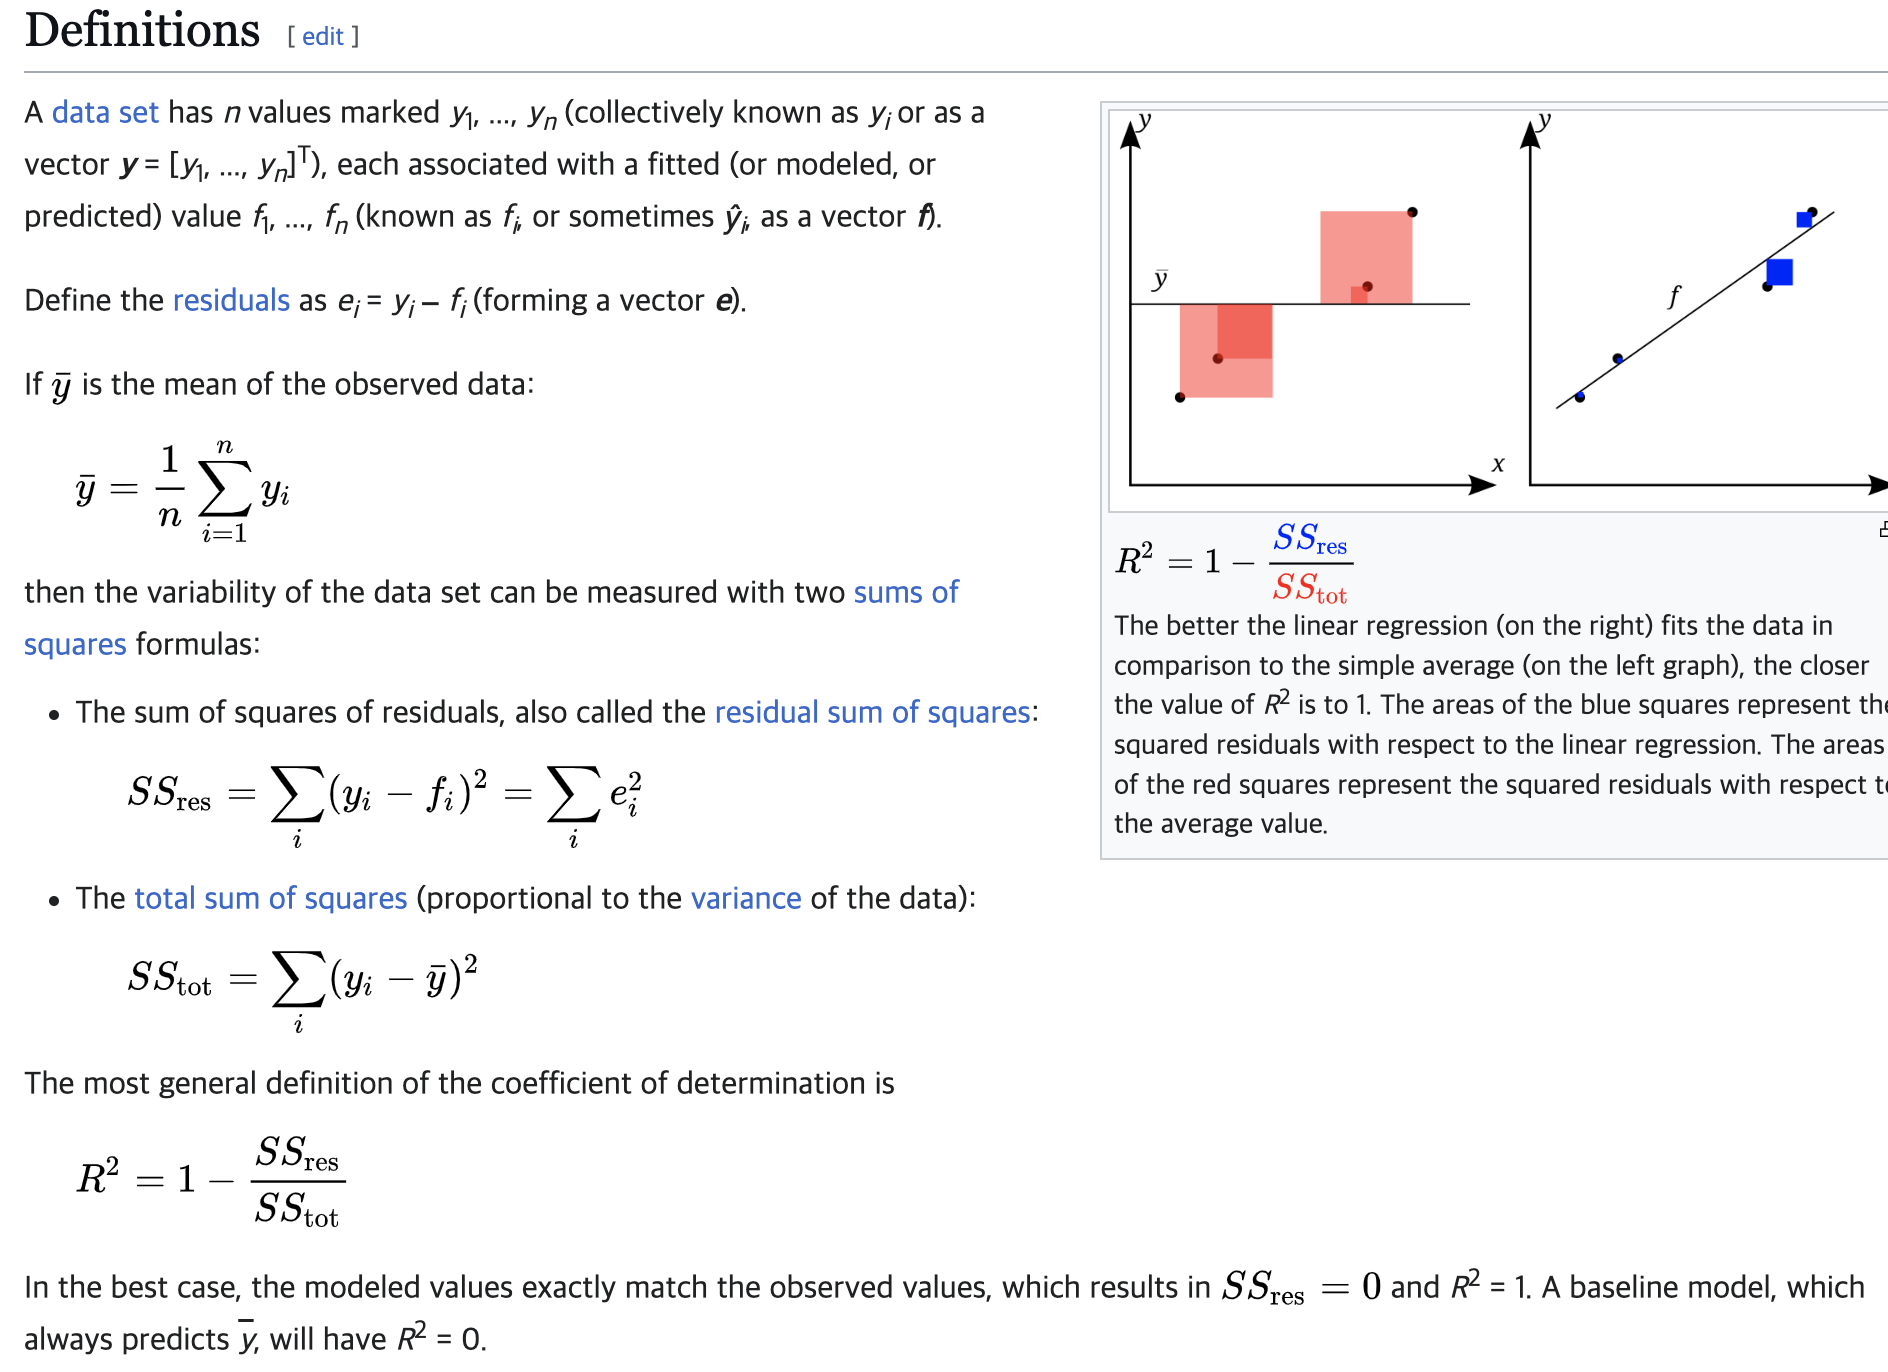

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
Y = np.array([2,4,6,8,10,12,14,16,18,20])
kf = KFold(n_splits=5, shuffle=True, random_state=42)
model = LinearRegression()
scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
print("각 fold의 R^2 점수:", scores)
print("평균 R^2 점수:", np.mean(scores))

각 fold의 R^2 점수: [1. 1. 1. 1. 1.]
평균 R^2 점수: 1.0


**설명:**
- KFold를 사용해 5번 데이터를 나눠서 모델을 평가
- 평균 R^2 점수는 전체 모델의 성능을 더 잘 반영

### **실습 문제 12.**
- Y값을 [3, 6, 9, 12, 15, 18, 21, 24, 27, 30]로 바꿔서 5-fold 교차검증의 평균 R^2 점수를 구해보세요.

In [ ]:
# 여기에 코드 작성

In [ ]:

Y4 = np.array([3, 6, 9, 12, 15, 18, 21, 24, 27, 30])
scores2 = cross_val_score(model, X, Y4, cv=kf, scoring='r2')
print("각 fold의 R^2 점수:", scores2)
print("평균 R^2 점수:", np.mean(scores2))
# 데이터가 선형관계이므로 대부분 1에 가까운 값이 나올 것입니다.


각 fold의 R^2 점수: [1. 1. 1. 1. 1.]
평균 R^2 점수: 1.0


---
## 4. 정규화(Normalization) 실습
**문제 13.**
아래의 데이터를 0~1 사이로 Min-Max 정규화를 해보세요.

X = [2, 4, 6, 8, 10]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

X = np.array([2, 4, 6, 8, 10]).reshape(-1, 1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print("정규화된 X:", X_scaled.ravel())


정규화된 X: [0.   0.25 0.5  0.75 1.  ]



reference:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
```
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```



**설명:**
- 데이터의 최소/최대값을 0과 1에 맞춰 변환

### **실습 문제 13.**
- X = [1, 5, 10, 20, 100]일 때도 같은 방식으로 정규화 결과를 구해보세요.

In [ ]:
# 여기에 코드 작성

In [ ]:
X5 = np.array([1, 5, 10, 20, 100]).reshape(-1, 1)
scaler2 = MinMaxScaler()
X5_scaled = scaler2.fit_transform(X5)
print("정규화된 X:", X5_scaled.ravel())
# 1은 0, 100은 1로, 나머지는 비례해서 변환됩니다.


정규화된 X: [0.         0.04040404 0.09090909 0.19191919 1.        ]


---
## 6. Train/Test Split 실습
**문제 15:**
아래 데이터(X, Y)를 80%/20%로 훈련/테스트 세트로 나눈 뒤, 훈련 세트로 선형회귀 모델을 학습하고, 테스트 세트에서의 R² 점수를 출력하세요.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
# Y = np.array([2,4,6,8,10,12,14,16,18,20])
Y = np.array([2,5,6,9,9,12,15,16,18,21])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
r2_score = model.score(X_test, Y_test)
print("테스트 세트 R^2 점수:", r2_score)

테스트 세트 R^2 점수: 0.9833074179090826


**설명:**
- `train_test_split`으로 데이터를 나누고, 훈련 데이터로 학습, 테스트 데이터로 평가합니다.


### **실습 문제 14.**
- X = [1~20], Y = [x*3 for x in X]로 바꿔서 70%를 훈련, 30%를 테스트로 나누고, 테스트 세트의 R² 점수를 출력해보세요.

In [ ]:
# 여기에 코드 작성

In [ ]:

X6 = np.arange(1, 21).reshape(-1, 1)
Y6 = np.arange(1, 21) * 3
X_train6, X_test6, Y_train6, Y_test6 = train_test_split(X6, Y6, test_size=0.3, random_state=42)
model6 = LinearRegression()
model6.fit(X_train6, Y_train6)
r2_6 = model6.score(X_test6, Y_test6)
print("테스트 세트 R^2 점수:", r2_6)
# Y가 X의 3배라 완벽한 선형관계이므로 R^2=1.0에 아주 가깝습니다.

테스트 세트 R^2 점수: 1.0


---
## 7. Cross-validation vs Train/Test Split 비교 실습
### **실습 문제 15.**
아래 데이터에서
- 5-fold 교차검증으로 선형회귀의 평균 R² 점수와
- train/test split(80%/20%)으로 측정한 R² 점수를 비교해보세요.

In [ ]:
# 여기에 코드 작성

In [ ]:

from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

X = np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1, 1)
# Y = np.array([2,4,6,8,10,12,14,16,18,20])
Y = np.array([2,5,6,9,9,12,15,16,18,21])

# 5-fold 교차검증
kf = KFold(n_splits=5, shuffle=True, random_state=0)
model = LinearRegression()
cv_scores = cross_val_score(model, X, Y, cv=kf, scoring='r2')
print("5-fold 교차검증 평균 R^2:", np.mean(cv_scores))


# train/test split
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size=0.2, random_state=0)
model2 = LinearRegression()
model2.fit(X_tr, Y_tr)
r2_tt = model2.score(X_te, Y_te)
print("train/test split R^2:", r2_tt)
# 교차검증은 여러 번 나눠서 평균, train/test split은 한번만 평가!

5-fold 교차검증 평균 R^2: 0.9774143645839335
train/test split R^2: 0.9954867666713899


[Full Notebook](https://colab.research.google.com/drive/1d5Oud6sj-BJ-LdOyrcbjxTZOlkF-jesh?usp=sharing)